In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('RK_approx.csv')

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [37]:
df.columns

Index(['Tempo', 'Suscetiveis', 'Infectados'], dtype='object')

In [38]:
t = np.array(df['Tempo'])
s = np.array(df['Suscetiveis'])
i = np.array(df['Infectados'])

In [39]:
def spline_cubico(df, x_col, y_col, x_new):
    x = df[x_col].values
    y = df[y_col].values
    n = len(x) - 1
    h = np.diff(x)

    # Montando o sistema de equações para encontrar os coeficientes c
    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)

    A[0, 0] = 1
    A[n, n] = 1
    for i in range(1, n):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]
        b[i] = 3 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1])

    # Resolvendo para c
    c = np.linalg.solve(A, b)

    # Calculando os coeficientes a, b, e d
    a = y[:-1]
    b = np.zeros(n)
    d = np.zeros(n)
    for i in range(n):
        b[i] = (y[i + 1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i + 1]) / 3
        d[i] = (c[i + 1] - c[i]) / (3 * h[i])

    # Função para avaliar o spline em um dado ponto x_val
    def evaluate_spline(x_val):
        if x_val < x[0] or x_val > x[-1]:
            return None
        for i in range(n):
            if x[i] <= x_val <= x[i + 1]:
                delta = x_val - x[i]
                return a[i] + b[i] * delta + c[i] * delta**2 + d[i] * delta**3

    # Interpolando os valores de y para os novos valores de x
    y_new = np.array([evaluate_spline(xi) for xi in x_new])

    return y_new

In [40]:


# Novos valores de x para interpolação
x_new = np.linspace(df['Tempo'].min(), df['Tempo'].max(), 100)

# Interpolação para Infectados
i_approx = spline_cubico(df, 'Tempo', 'Infectados', x_new)

# Interpolação para Suscetíveis
s_approx = spline_cubico(df, 'Tempo', 'Suscetiveis', x_new)

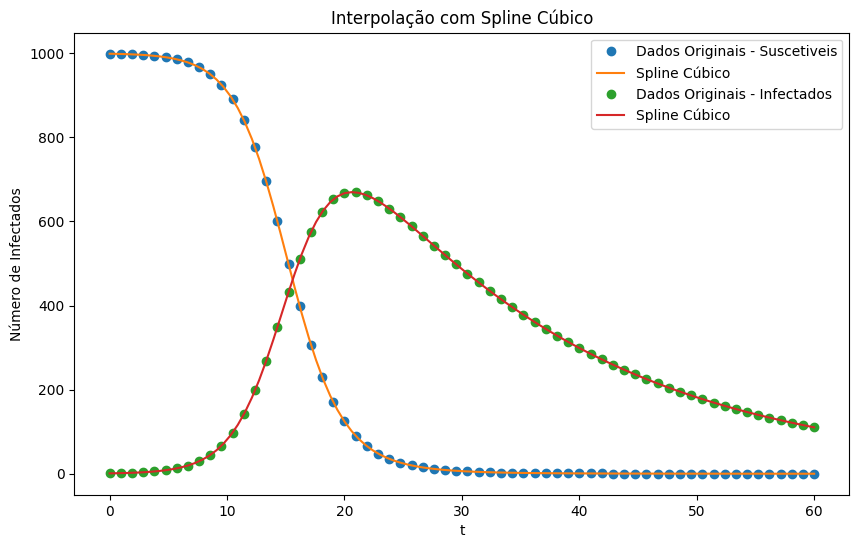

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(df['Tempo'], df['Suscetiveis'], 'o', label='Dados Originais - Suscetiveis')
plt.plot(x_new, s_approx, '-', label='Spline Cúbico')

plt.plot(df['Tempo'], df['Infectados'], 'o', label='Dados Originais - Infectados')
plt.plot(x_new, i_approx, '-', label='Spline Cúbico')

plt.xlabel('t')

plt.ylabel('Número de Infectados')
plt.title('Interpolação com Spline Cúbico')
plt.legend()
plt.show()


